In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc089e4fbb0>,
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

In [27]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc089e4ffd0>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [121]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [246]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [107]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

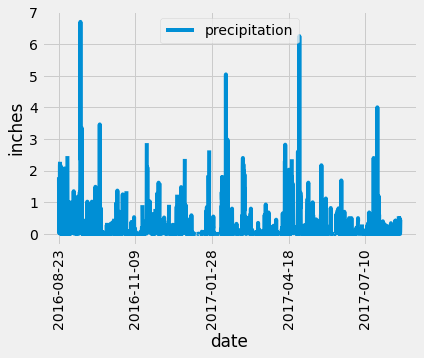

In [162]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2016, 8, 23)
end_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and precipitation scores
yearly_prcp = session.query(Measurement.date, 
                            Measurement.prcp).filter(Measurement.date >= start_date, 
                                                     Measurement.date <= end_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(yearly_prcp, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.ylabel('inches')
plt.xticks(rotation=90)
plt.show()



In [174]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [206]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).scalar()

9

In [244]:
session.query(Measurement.station).group_by(Measurement.station).all()

[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [212]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(func.count(Measurement.station)).group_by(Measurement.station).all()

[(1979,),
 (2709,),
 (2202,),
 (2612,),
 (1372,),
 (511,),
 (2772,),
 (2724,),
 (2669,)]

In [228]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
most_active_station = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
most_active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [241]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_tobs = session.query(Measurement.date, 
                            Measurement.tobs).filter(Measurement.date >= start_date, 
                                                     Measurement.date <= end_date,
                                                     Measurement.station == 'USC00519281').all()

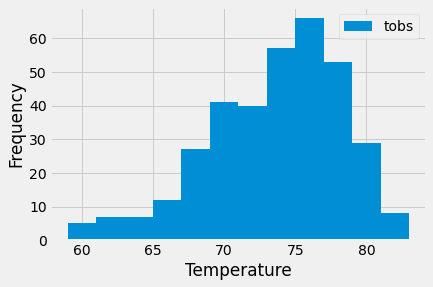

In [243]:
df2 = pd.DataFrame(yearly_tobs, columns=['date', 'tobs'])
df2.set_index('date', inplace=True)
df2 = df2.sort_index()
ax = df2.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close session

In [245]:
# Close Session
session.close()